In [22]:

import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [24]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.


no_of_asset_classes = 3
no_of_observations = 260


In [25]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 16000

In [26]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [27]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights = random_asset_weights / random_asset_weights.sum()
   
    return random_asset_weights

In [28]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.mean(matrix_of_return_values, axis = 1)
    asset_covariances = np.cov(matrix_of_return_values)
    portfolio_mean = np.dot(asset_weights, asset_means)
    #portfolio_mean = #todo second line if needed.
    portfolio_standard_deviation = np.std(np.dot(asset_weights, matrix_of_return_values))
    #portfolio_standard_deviation = #todo second line if needed.
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [29]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.

while len(collection_of_random_asset_weights)< no_of_portfolios:
    random_asset_weights = get_random_asset_weights (no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    statistic = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(statistic[0])
    portfolio_standard_deviations.append(statistic[1])
    portfolio_sharpe_ratios.append(statistic[2])

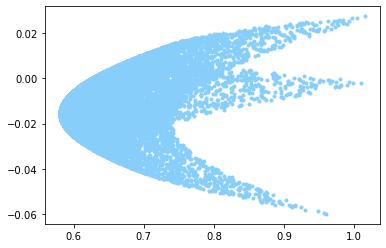

In [30]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means,'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [31]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = np.array(portfolio_sharpe_ratios).argmax()

In [35]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print(f"{collection_of_random_asset_weights[index]= }")
print(f"{portfolio_sharpe_ratios[index]= }")

collection_of_random_asset_weights[index]= array([0.01372236, 0.00378921, 0.98248842])
portfolio_sharpe_ratios[index]= 0.027123535852461876


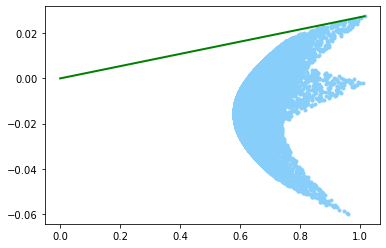

In [33]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

In our example, we (assumed Rf = 0) .
However, if we want to include it in our calculation of the Sharpe ratio, then we will subtract the
free risk return from our expected portfolio returns.
Which means 
portfolio_mean = np.dot(asset_weights, asset_means) - Rf
so the sharp ratio will be 
SR = (Expected Asset Return - Free Risk Return) / (Asset Standard Deviation)
